In [ ]:
import pandas as pd

# 读取Excel文件中的第一个sheet
df = pd.read_excel('data/sx_real_data.xlsx', sheet_name=0)
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 提取所需列并转换为numpy数组
gamma = df['gamma'].values
sigma = df['sigma'].values 
time = df['Time'].values

# 定义Maxwell模型的微分方程
def maxwell_model(t, E, eta):
    """
    Maxwell模型的微分方程解
    E: 弹性模量
    eta: 粘度系数
    """
    gamma_dot = np.gradient(gamma, t) # 计算应变率
    sigma_pred = np.zeros_like(t)
    
    # 使用差分方法求解微分方程,并设置初始条件
    dt = t[1] - t[0]
    # 设置t=0时的边界条件
    sigma_pred[0] = 2.9097  # 初始应力值
    gamma_0 = 0.0105      # 初始应变值
    
    for i in range(1, len(t)):
        dsigma = (E * gamma_dot[i] - sigma_pred[i-1]/eta) * dt
        sigma_pred[i] = sigma_pred[i-1] + dsigma
        
    return sigma_pred

# 初始参数猜测
E_init = 0.1  # 初始弹性模量
eta_init = 0.1 # 初始粘度系数
p0 = [E_init, eta_init]

# 使用最小二乘法拟合
popt, pcov = curve_fit(maxwell_model, time, sigma, p0=p0)
E_fit, eta_fit = popt

# 计算拟合曲线
sigma_fit = maxwell_model(time, E_fit, eta_fit)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(gamma, sigma, 'bo', label='experiment', markersize=2)
plt.plot(gamma, sigma_fit, 'r-', label='Maxwell curve')
plt.xlabel('$\gamma$')
plt.ylabel('$\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.show()

# 打印拟合参数
print(f'拟合参数结果：')
print(f'弹性模量 E = {E_fit:.2e} Pa')
print(f'粘度系数 η = {eta_fit:.2e} Pa·s')
print(f'特征时间 λ = {eta_fit/E_fit:.2e} s')



# 读取sheet_name=new的数据
data_new = pd.read_excel('data/sx_real_data.xlsx', sheet_name=2)
time_new = data_new['Time'].values
gamma_new = data_new['gamma'].values 
sigma_new = data_new['sigma'].values

# 使用已拟合的Maxwell模型预测应力
sigma_pred_new = maxwell_model(time_new, E_fit, eta_fit)

# 绘制对比图
plt.figure(figsize=(10, 6))
plt.plot(gamma_new, sigma_new, 'bo', label='experiment', markersize=2)
plt.plot(gamma_new, sigma_pred_new, 'r-', label='Maxwell predict')
plt.xlabel('$\gamma$')
plt.ylabel('$\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.show()

# 输出数据
print("\nSheet new数据:")
print("时间范围:", time_new[0], "至", time_new[-1], "秒")
print("应变范围:", gamma_new[0], "至", gamma_new[-1])
print("实际应力范围:", min(sigma_new), "至", max(sigma_new), "Pa")
print("预测应力范围:", min(sigma_pred_new), "至", max(sigma_pred_new), "Pa")


In [ ]:

import pandas as pd

# 读取Excel文件中的第一个sheet
df = pd.read_excel('data/sx_real_data.xlsx', sheet_name=26)
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 提取所需列并转换为numpy数组
gamma = df['gamma'].values
sigma = df['sigma'].values 
time = df['Time'].values

# 定义Maxwell模型的微分方程
def maxwell_model(t, E, eta):
    """
    Maxwell模型的微分方程解
    E: 弹性模量
    eta: 粘度系数
    """
    gamma_dot = np.gradient(gamma, t) # 计算应变率
    sigma_pred = np.zeros_like(t)
    
    # 使用差分方法求解微分方程
    dt = t[1] - t[0]
    sigma_pred[0] = E * gamma[0]

    sigma_pred[0] = 18526  # 初始应力值
    for i in range(1, len(t)):
        dsigma = (E * gamma_dot[i] - sigma_pred[i-1]/eta) * dt
        sigma_pred[i] = sigma_pred[i-1] + dsigma
        
    return sigma_pred

# 初始参数猜测
E_init = 10  # 初始弹性模量
eta_init = 9 # 初始粘度系数
p0 = [E_init, eta_init]

# 使用最小二乘法拟合
popt, pcov = curve_fit(maxwell_model, time, sigma, p0=p0)
E_fit, eta_fit = popt

# 计算拟合曲线
sigma_fit = maxwell_model(time, E_fit, eta_fit)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(gamma, sigma, 'bo', label='experiment', markersize=2)
plt.plot(gamma, sigma_fit, 'r-', label='Maxwell curve')
plt.xlabel('$\gamma$')
plt.ylabel('$\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.show()

# 打印拟合参数
print(f'拟合参数结果：')
print(f'弹性模量 E = {E_fit:.2e} Pa')
print(f'粘度系数 η = {eta_fit:.2e} Pa·s')
print(f'特征时间 λ = {eta_fit/E_fit:.2e} s')


# 读取sheet_name=new的数据
data_new = pd.read_excel('data/sx_real_data.xlsx', sheet_name=20)
time_new = data_new['Time'].values
gamma_new = data_new['gamma'].values 
sigma_new = data_new['sigma'].values

# 使用已拟合的Maxwell模型预测应力
sigma_pred_new = maxwell_model(time_new, E_fit, eta_fit)

# 绘制对比图
plt.figure(figsize=(10, 6))
plt.plot(gamma_new, sigma_new, 'bo', label='experiment', markersize=2)
plt.plot(gamma_new, sigma_pred_new, 'r-', label='Maxwell predict')
plt.xlabel('$\gamma$')
plt.ylabel('$\sigma$')
# plt.title('Sheet 26 数据的Maxwell模型预测对比')
plt.legend()
plt.grid(True)
plt.show()

# 输出数据
print("\nSheet new数据:")
print("时间范围:", time_new[0], "至", time_new[-1], "秒")
print("应变范围:", gamma_new[0], "至", gamma_new[-1])
print("实际应力范围:", min(sigma_new), "至", max(sigma_new), "Pa")
print("预测应力范围:", min(sigma_pred_new), "至", max(sigma_pred_new), "Pa")




# 拟合Giesekus模型

全局拟合参数结果：
模量 G = 9.32e-03 Pa
零剪切粘度 η = 1.77e+06 Pa·s
迁移因子 α = 4.11e-02
特征时间 λ = 1.90e+08 s


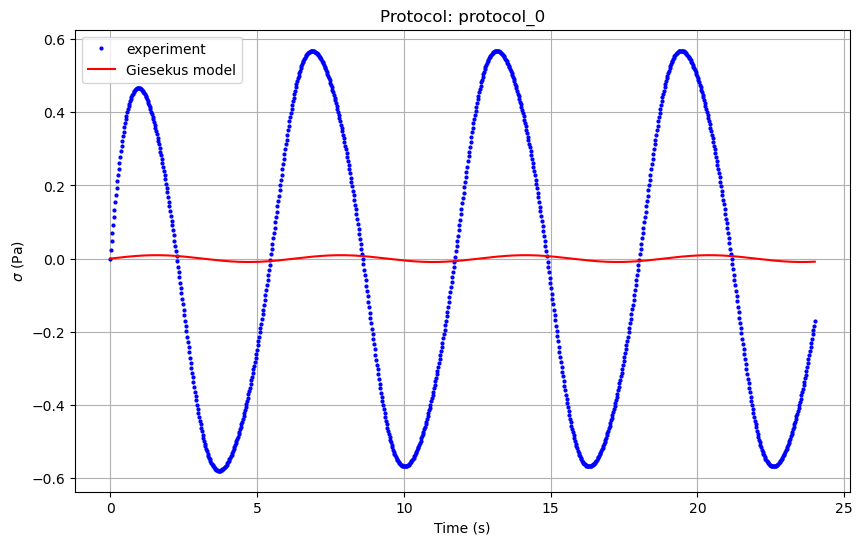


协议 protocol_0 的拟合结果:
时间范围: 0.00 至 24.00 秒
剪切率范围: -1.00 至 1.00 1/s
实际应力范围: -0.58 至 0.57 Pa
预测应力范围: -0.01 至 0.01 Pa


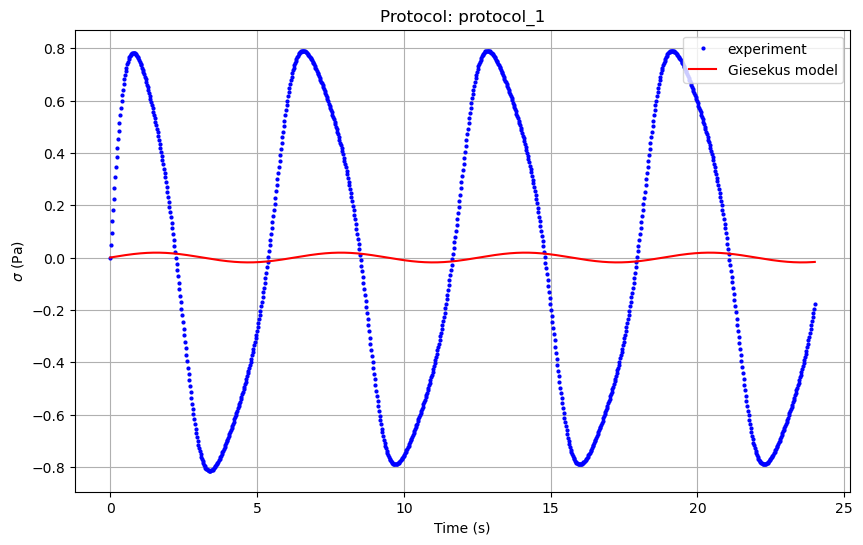


协议 protocol_1 的拟合结果:
时间范围: 0.00 至 24.00 秒
剪切率范围: -2.00 至 2.00 1/s
实际应力范围: -0.81 至 0.79 Pa
预测应力范围: -0.02 至 0.02 Pa


In [3]:
import pandas as pd
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# 读取Excel文件中的所有sheet
df_dict = pd.read_excel('data/giesekus_model_train_data.xlsx', sheet_name=['protocol_0','protocol_1'])

# 将所有协议的数据合并到一起
time_all = np.array([])
gamma_dot_all = np.array([])
sigma_all = np.array([])

# 保存每个协议的数据用于后续绘图
protocol_data = {}

for sheet_name, df in df_dict.items():
    time = df['Time'].values
    gamma_dot = df['γd12'].values
    sigma = df['σ12'].values
    
    # 保存单个协议的数据
    protocol_data[sheet_name] = {
        'time': time,
        'gamma_dot': gamma_dot,
        'sigma': sigma
    }
    
    # 合并数据
    time_all = np.concatenate([time_all, time])
    gamma_dot_all = np.concatenate([gamma_dot_all, gamma_dot])
    sigma_all = np.concatenate([sigma_all, sigma])

def giesekus_ode(t, sigma, G, eta, alpha, gamma_dot_t):
    """
    Giesekus模型的微分方程
    """
    lambda_1 = eta/G  # 特征时间
    dsigma_dt = G * gamma_dot_t - sigma/lambda_1 - (alpha/eta) * sigma**2/lambda_1
    return dsigma_dt

def solve_giesekus(params, time, gamma_dot):
    """
    求解Giesekus模型
    使用RK45方法求解ODE
    """
    G, eta, alpha = params
    sigma_pred = np.zeros_like(time)
    sigma_pred[0] = 0  # 初始条件
    
    from scipy.interpolate import interp1d
    # 添加一个微小的偏移量避免浮点数精度问题
    time_adjusted = np.linspace(time[0], time[-1], len(time))
    gamma_dot_interp = interp1d(time_adjusted, gamma_dot, kind='linear', bounds_error=False, fill_value="extrapolate")
    
    dt = time[1] - time[0]
    for i in range(1, len(time)):
        k1 = giesekus_ode(time[i-1], sigma_pred[i-1], G, eta, alpha, gamma_dot_interp(time[i-1]))
        k2 = giesekus_ode(time[i-1] + dt/2, sigma_pred[i-1] + dt*k1/2, G, eta, alpha, gamma_dot_interp(time[i-1] + dt/2))
        k3 = giesekus_ode(time[i-1] + dt/2, sigma_pred[i-1] + dt*k2/2, G, eta, alpha, gamma_dot_interp(time[i-1] + dt/2))
        k4 = giesekus_ode(time[i-1] + dt, sigma_pred[i-1] + dt*k3, G, eta, alpha, gamma_dot_interp(time[i-1] + dt))
        
        sigma_pred[i] = sigma_pred[i-1] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    
    return sigma_pred

def objective(params, time, gamma_dot, sigma_exp):
    """
    目标函数：计算预测值与实验值之间的残差
    """
    sigma_pred = solve_giesekus(params, time, gamma_dot)
    return sigma_pred - sigma_exp

# 初始参数猜测
G_init = 0.1  # 初始模量
eta_init = 1.0  # 初始零剪切粘度
alpha_init = 0.8  # 初始迁移因子
p0 = [G_init, eta_init, alpha_init]

# 使用Levenberg-Marquardt算法进行拟合
result = least_squares(
    objective, 
    p0, 
    args=(time_all, gamma_dot_all, sigma_all),
    bounds=([0, 0, 0], [np.inf, np.inf, 1]),
    method='trf',  # Trust Region Reflective算法
    ftol=1e-10,
    xtol=1e-10,
    gtol=1e-10,
    max_nfev=1000
)

# 获取拟合参数
G_fit, eta_fit, alpha_fit = result.x

# 打印拟合参数
print(f'全局拟合参数结果：')
print(f'模量 G = {G_fit:.2e} Pa')
print(f'零剪切粘度 η = {eta_fit:.2e} Pa·s')
print(f'迁移因子 α = {alpha_fit:.2e}')
print(f'特征时间 λ = {eta_fit/G_fit:.2e} s')

# 对每个协议使用相同的参数进行预测和绘图
for sheet_name, data in protocol_data.items():
    time = data['time']
    gamma_dot = data['gamma_dot']
    sigma_exp = data['sigma']
    
    # 使用拟合的参数进行预测
    sigma_pred = solve_giesekus([G_fit, eta_fit, alpha_fit], time, gamma_dot)
    
    # 绘制对比图
    plt.figure(figsize=(10, 6))
    plt.plot(time, sigma_exp, 'bo', label='experiment', markersize=2)
    plt.plot(time, sigma_pred, 'r-', label='Giesekus model')
    plt.xlabel('Time (s)')
    plt.ylabel('$\sigma$ (Pa)')
    plt.title(f'Protocol: {sheet_name}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 输出每个协议的拟合效果
    print(f"\n协议 {sheet_name} 的拟合结果:")
    print(f"时间范围: {time[0]:.2f} 至 {time[-1]:.2f} 秒")
    print(f"剪切率范围: {min(gamma_dot):.2f} 至 {max(gamma_dot):.2f} 1/s")
    print(f"实际应力范围: {min(sigma_exp):.2f} 至 {max(sigma_exp):.2f} Pa")
    print(f"预测应力范围: {min(sigma_pred):.2f} 至 {max(sigma_pred):.2f} Pa")
